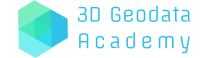

Created by Florent Poux. Licence MIT.
Members of the [3D Geodata Academy](https://learngeodata.eu) enrolled in a Course can use the code with Privileged IP Rights. 

*   To reuse in your project, please tag me on [Linkedin](https://www.linkedin.com/in/florent-poux-point-cloud/), [Medium](https://medium.com/@florentpoux) or [Twitter](https://twitter.com/PouxPointCloud).
*   Have fun with this notebook that you can very simply run (ctrl+Enter) !
*   The first time thought, it will ask you to get a key for it to be able to acces your Google drive folders if you want to work all remotely.
*   Simply accept, and then change the input path by the folder path containing your data, on Google Drive.

Enjoy!

# Step 1 & 2: Setting up the environment and loading the data

In [ ]:
#This code snippet allows to use data directly from your Google drives files.
#If you want to use a shared folder, just add the folder to your drive
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# http://www.open3d.org/docs/release/getting_started.html
!pip install open3d
!pip install

#libraries used
import numpy as np
import open3d as o3d #conda install -c open3d-admin open3d
import laspy as lp

In [ ]:
#create paths and load data
input_path="."
dataname="heerlen_table.las"

point_cloud=lp.read(input_path+dataname)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose())
pcd.colors = o3d.utility.Vector3dVector(np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()/65535)


colors = np.asarray(mesh.vertex_colors)
normals = np.asarray(mesh.vertex_normals)
vertices = np.asarray(mesh.vertices)

print('vertex_colors: ', np.unique(np.asarray(mesh.vertex_colors), axis=0))
print('vertex_normals: ', np.asarray(mesh.vertex_normals)[:5])
print('vertices: ', np.asarray(mesh.vertices)[:5])

#Create a voxel grid from the point cloud with a voxel_size of 0.01

pcd = o3d.geometry.PointCloud()

pcd.points = o3d.utility.Vector3dVector(vertices)
pcd.colors = o3d.utility.Vector3dVector(colors)
pcd.normals = o3d.utility.Vector3dVector(normals)

voxel_grid=o3d.geometry.VoxelGrid.create_from_point_cloud(pcd,voxel_size=0.03)

# Step 3: Creating the voxel grid

In [ ]:
vsize=max(pcd.get_max_bound()-pcd.get_min_bound())*0.005
vsize=round(vsize,4)
        
voxel_grid=o3d.geometry.VoxelGrid.create_from_point_cloud(pcd,voxel_size=vsize)
bounds=voxel_grid.get_max_bound()-voxel_grid.get_min_bound()

# o3d.visualization.draw_geometries([voxel_grid])


# Step 4: Creating the cube voxels

In [ ]:
voxels=voxel_grid.get_voxels()
vox_mesh=o3d.geometry.TriangleMesh()
for v in voxels:
    cube=o3d.geometry.TriangleMesh.create_box(width=1, height=1, depth=1)
    cube.paint_uniform_color(v.color)
    cube.translate(v.grid_index, relative=False)
    vox_mesh+=cube

# Step 5: Exporting the voxels as one mesh

In [ ]:
vox_mesh.translate([0.5,0.5,0.5], relative=True)
vox_mesh.scale(vsize, [0,0,0])

vox_mesh.merge_close_vertices(0.0000001)
# T=np.array([[1, 0, 0, 0],[0, 0, 1, 0],[0, -1, 0, 0],[0, 0, 0, 1]])

vox_mesh.translate(voxel_grid.origin, relative=True)

o3d.io.write_triangle_mesh(input_path+"voxel_mesh_heerlen_rotated_v2.ply", vox_mesh.transform(T))


# BONUS: Small drawing function for Colab

In [ ]:
from mpl_toolkits import mplot3d

pc=np.asarray(pcd.points)
ax = plt.axes(projection='3d')
ax.scatter(pc[:,0], pc[:,1], pc[:,2], c = np.asarray(pcd.colors), s=0.01)
plt.show()